In [1]:
import networkx as nx
import csv
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf


In [2]:
G=nx.read_edgelist('datasets/edgelist.txt', delimiter=',',create_using=nx.Graph(),nodetype=int)
nodes=list(G.nodes())
n=G.number_of_nodes()
m=G.number_of_edges()

print('Number of nodes:', n)

print('Number of edges:', m)


Number of nodes: 138499
Number of edges: 1091955


In [3]:
abstracts=dict()
with open('datasets/abstracts.txt', 'r',encoding="utf-8") as f:
    for line in f:
        node,abstract=line.split('|--|')
        abstracts[int(node)]=abstract

In [4]:

def initialize_x_train(number_of_edges,list_of_features,mypath):
    mypath=mypath
    number_of_features=len(list_of_features)
    print("number_of_edges:",number_of_edges)
    #mul by 2 for the training matrix
    x=np.zeros((2*number_of_edges,number_of_features))
    for idx,feature in enumerate(list_of_features):
        print("loading column {} with feature {}".format(idx,feature))
        x[:,idx]=np.genfromtxt(mypath+feature,delimiter=',')
    return x

In [5]:
def initialize_x_test(number_of_edges,list_of_features,mypath):
    mypath=mypath
    number_of_features=len(list_of_features)
    print("number_of_edges:",number_of_edges)
    #mul by 1 for the training matrix
    x=np.zeros((number_of_edges,number_of_features))
    for idx,feature in enumerate(list_of_features):
        print("loading column {} with feature {}".format(idx,feature))
        x[:,idx]=np.genfromtxt(mypath+feature,delimiter=',')
    return x

In [6]:
from os import listdir
from os.path import isfile,join
def get_feature_files(mypath):
    mypath=mypath
    features_to_include=[feature for feature in listdir(mypath)]
    print("included features are: ",features_to_include)
    return features_to_include
    

In [7]:
mypath='C:/Users/pchrk/OneDrive/Desktop/features/features_train/p/'
X_train=initialize_x_train(m,get_feature_files(mypath),mypath)

included features are:  ['abs_diff_author_graph_degree.csv', 'abs_diff_average_neighbor_degree.csv', 'abs_diff_clustering.csv', 'abs_diff_pagerank.csv', 'authorities_sum.csv', 'author_graph_degree_sum.csv', 'average_neighbor_degree.csv', 'clustering_sum.csv', 'degree_centrality.csv', 'doc2vec_train.csv', 'hubs_sum.csv', 'pagerank_sum.csv', 'word2vec_train.csv']
number_of_edges: 1091955
loading column 0 with feature abs_diff_author_graph_degree.csv
loading column 1 with feature abs_diff_average_neighbor_degree.csv
loading column 2 with feature abs_diff_clustering.csv
loading column 3 with feature abs_diff_pagerank.csv
loading column 4 with feature authorities_sum.csv
loading column 5 with feature author_graph_degree_sum.csv
loading column 6 with feature average_neighbor_degree.csv
loading column 7 with feature clustering_sum.csv
loading column 8 with feature degree_centrality.csv
loading column 9 with feature doc2vec_train.csv
loading column 10 with feature hubs_sum.csv
loading column 1

In [8]:
y_train=np.genfromtxt('datasets/Y_train.csv',delimiter=',')

In [9]:
X_train_m,y_train_m=shuffle(X_train,y_train)

In [10]:
node_pairs = list()
with open('datasets/test.txt', 'r') as f:
    for line in f:
        t = line.split(',')
        #the raw split form is ['12223', '345332\n']
        #we need to make them integers
        #use the function int()
        node_pairs.append((int(t[0]), int(t[1])))

In [11]:
mypath='C:/Users/pchrk/OneDrive/Desktop/features/features_test/p/'
X_test=initialize_x_test(len(node_pairs),get_feature_files(mypath),mypath)

included features are:  ['abs_diff_author_graph_degree_test.csv', 'abs_diff_average_neighbor_degree_test.csv', 'abs_diff_clustering_test.csv', 'abs_diff_pagerank_test.csv', 'authorities_sum_test.csv', 'author_graph_degree_sum_test.csv', 'average_neighbor_degree_test.csv', 'clustering_sum_test.csv', 'degree_centrality_test.csv', 'doc2vec_test.csv', 'hubs_sum_test.csv', 'pagerank_sum_test.csv', 'word2vec_test.csv']
number_of_edges: 106692
loading column 0 with feature abs_diff_author_graph_degree_test.csv
loading column 1 with feature abs_diff_average_neighbor_degree_test.csv
loading column 2 with feature abs_diff_clustering_test.csv
loading column 3 with feature abs_diff_pagerank_test.csv
loading column 4 with feature authorities_sum_test.csv
loading column 5 with feature author_graph_degree_sum_test.csv
loading column 6 with feature average_neighbor_degree_test.csv
loading column 7 with feature clustering_sum_test.csv
loading column 8 with feature degree_centrality_test.csv
loading col

In [14]:
from keras import models,layers

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(13,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
4266/4266 [==============================] - 13s 3ms/step - loss: 0.7107 - accuracy: 0.5334
Epoch 2/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6725 - accuracy: 0.5791
Epoch 3/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6680 - accuracy: 0.5874
Epoch 4/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6668 - accuracy: 0.5894
Epoch 5/10
4266/4266 [==============================] - 13s 3ms/step - loss: 0.6660 - accuracy: 0.5906
Epoch 6/10
4266/4266 [==============================] - 13s 3ms/step - loss: 0.6655 - accuracy: 0.5915
Epoch 7/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6651 - accuracy: 0.5923
Epoch 8/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6648 - accuracy: 0.5928
Epoch 9/10
4266/4266 [==============================] - 12s 3ms/step - loss: 0.6646 - accuracy: 0.5927
Epoch 10/10
4266/4266 [==============================] - 12s 3ms/step - l

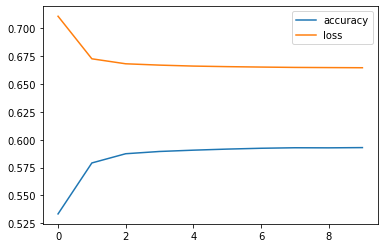

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(["accuracy","loss"])

In [19]:
y_pred=model.predict(X_test)
print(y_pred[:20,0])

3335/3335 [==============================] - 4s 1ms/step
[0.5606095  0.3155239  0.45690444 0.3131552  0.6790134  0.64789265
 0.56629187 0.4611507  0.52865916 0.51565367 0.66458356 0.45269486
 0.31047815 0.54145986 0.49280238 0.6182527  0.56867063 0.4007239
 0.51822793 0.30841503]


In [20]:
import csv
predictions=list(zip(range(len(y_pred)),y_pred[:,0]))
with open("submission_keras1noscale.csv", 'w') as outfile:
    csv_out=csv.writer(outfile)
    csv_out.writerow(['id','predicted'])

    for row in predictions: 
        csv_out.writerow(row)